<a href="https://colab.research.google.com/github/Eshwar1502/aphasia-detection-model/blob/main/Aphasia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing all the Required Features


In [ ]:
!pip install tensorflow tensorflow-io matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 28.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade tensorflow tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
!pip install tensorflow-io


In [ ]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 2. Building Functions to Load Data


In [ ]:
APHASIA_FILE = '/content/drive/MyDrive/OELP/google_collab_datasets/dysarthria_male/M01_Session1_0005.wav'
# APHASIA_FILE = os.path.join('/home','eshwar','Documents','OELP','Audio Recognition', 'dysarthria_male', 'M01_Session1_0005.wav')
# NOT_APHASIA_FILE = os.path.join('/home','eshwar','Documents','OELP','Audio Recognition', 'non_dysarthria_male', 'MC01_Session1_0005.wav')
NOT_APHASIA_FILE = '/content/drive/MyDrive/OELP/google_collab_datasets/non_dysarthria_male/MC01_Session1_0005.wav'

In [ ]:
APHASIA_FILE

'/content/drive/MyDrive/OELP/google_collab_datasets/dysarthria_male/M01_Session1_0005.wav'

##  Function to Decode the WAV File


In [ ]:
def load_wav_16k_mono(filename):
    # Load encoded wav file (Decoded Version of the WAV File in Binary)
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)  (This Decodes the WAV File)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
file_contents = tf.io.read_file(APHASIA_FILE)

In [ ]:
file_contents = tf.io.read_file(NOT_APHASIA_FILE)

In [ ]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [ ]:
print(wav.shape)

(193201, 1)


In [ ]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [ ]:
len(wav)

193201

## Plotting the Waves for the Aphasia And Non Aphasia Dataset


In [ ]:
wave = load_wav_16k_mono(APHASIA_FILE)
nwave = load_wav_16k_mono(NOT_APHASIA_FILE)

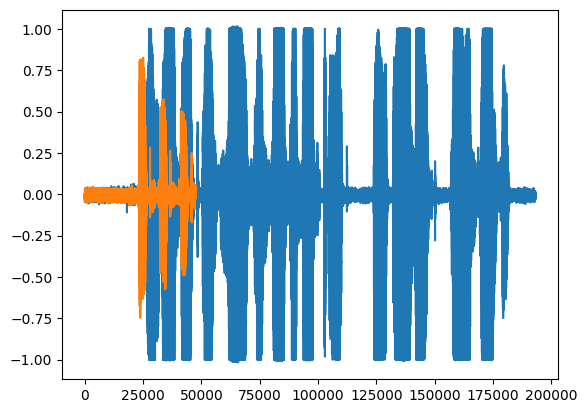

In [ ]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [ ]:
wave.shape, nwave.shape

(TensorShape([193201]), TensorShape([47440]))

# 3. Creating The Dataset

In [ ]:
POS = '/content/drive/MyDrive/OELP/google_collab_datasets/dysarthria_male'
NEG = '/content/drive/MyDrive/OELP/google_collab_datasets/non_dysarthria_male'

In [ ]:
POS

'/content/drive/MyDrive/OELP/google_collab_datasets/dysarthria_male'

In [ ]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [ ]:
pos.as_numpy_iterator().next()

b'/content/drive/MyDrive/OELP/google_collab_datasets/dysarthria_male/M01_Session2_3_0241.wav'

In [ ]:
neg.as_numpy_iterator().next()

b'/content/drive/MyDrive/OELP/google_collab_datasets/non_dysarthria_male/MC02_Session1_0177.wav'

## Zipping all the Datasets and adding Labels to it (1 for Aphasia , 0 for non-Aphasia )


In [ ]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [ ]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [ ]:
tf.zeros(len(neg))

<tf.Tensor: shape=(500,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
positives.as_numpy_iterator().next()

(b'/content/drive/MyDrive/OELP/google_collab_datasets/dysarthria_male/M01_Session1_0076.wav',
 1.0)

In [ ]:
negatives.as_numpy_iterator().next()

(b'/content/drive/MyDrive/OELP/google_collab_datasets/non_dysarthria_male/MC04_Session1_0328.wav',
 0.0)

In [ ]:
data.shuffle(10000).as_numpy_iterator().next()

(b'/content/drive/MyDrive/OELP/google_collab_datasets/non_dysarthria_male/MC01_Session2_0165.wav',
 0.0)

# 4. Calculating Lengths And Durations

In [ ]:
lengths = []
for file in os.listdir('/content/drive/MyDrive/OELP/google_collab_datasets/dysarthria_male'):
    tensor_wave = load_wav_16k_mono(os.path.join('/content/drive/MyDrive/OELP/google_collab_datasets/dysarthria_male', file))
    lengths.append(len(tensor_wave))

In [ ]:
os.listdir('/content/drive/MyDrive/OELP/google_collab_datasets/dysarthria_male')

In [ ]:
lengths

In [ ]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=67839>

In [ ]:
67839/16000

4.2399375

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=134>

In [ ]:
164/16000 #Shortest clip is about 0.01025 seconds

0.01025

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=405040>

In [ ]:
405040/16000    #Longest one is about 25 seconds

25.315

In [ ]:
# The Above Max is 4,05,40 and min is 134 so we need to take something between the both of them

# 5. Defining A Pre Process Function To Convert it to A Spectrogram

In [ ]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:80000]   #Take The values Based on the maximum length and minimum length of each click
    zero_padding = tf.zeros([80000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)

    # Spectogram
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)

    return spectrogram, label

In [ ]:
    wav = load_wav_16k_mono(NOT_APHASIA_FILE)
    wav = wav[:80000]   #Take The values Based on the maximum length and minimum length of each click
    zero_padding = tf.zeros([80000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)

In [ ]:
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)

In [ ]:
spectrogram.shape

TensorShape([2491, 257, 1])

In [ ]:
spectrogram

<tf.Tensor: shape=(2491, 257, 1), dtype=float32, numpy=
array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       ...,

       [[3.2226012e+00],
        [2.7257791e+00],
        [2.0286152e+00],
        ...,
        [8.6646505e-06],
        [7.7265649e-06],
        [9.7751617e-06]],

       [[3.6279111e+00],
        [3.2569883e+00],
        [2.4722764e+00],
        ...,
        [6.4596147e-06],
        [7.5707285e-06],
        [4.1723251e-06]],

       [[3.6625521e+00],
        [3.2968979e+00],
        [2.3575776e+00],
        ...,
        [1.4067201

## Testing Spectogram


In [ ]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [ ]:
spectrogram, label = preprocess(filepath, label)

In [ ]:
label

0.0

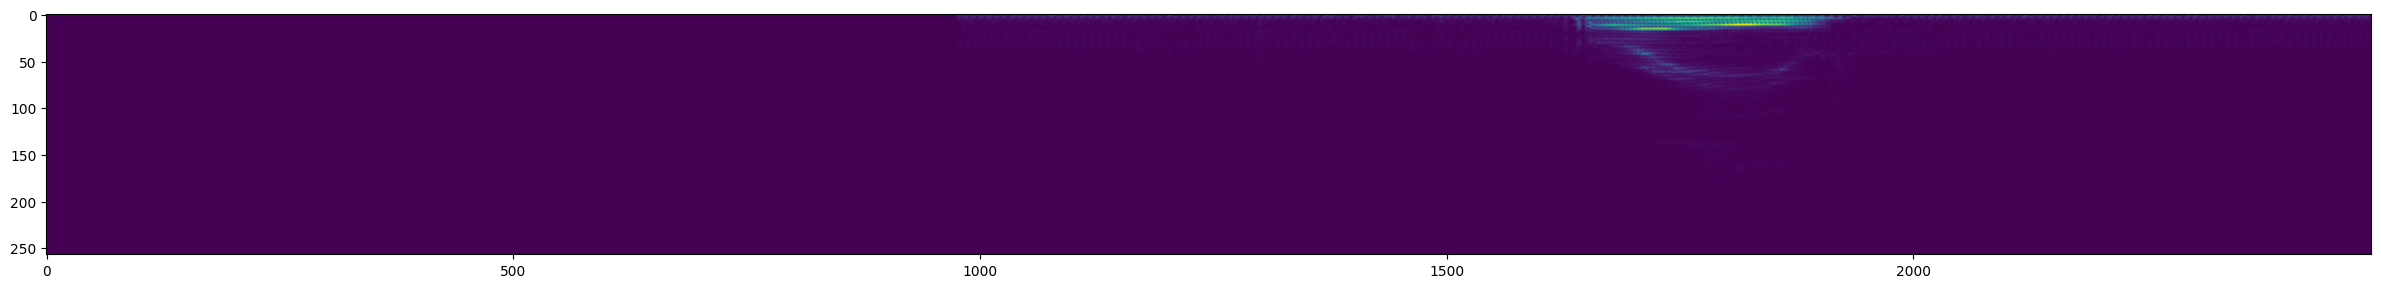

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# 6. Creating Training and Testing Datasets

In [ ]:
data = positives.concatenate(negatives)
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [ ]:
for spectrogram, label in data.take(1):  # Take one batch for inspection
    print("Shape of the spectrogram:", spectrogram.shape, label.shape)
    print(type(spectrogram), type(label))

Shape of the spectrogram: (16, 2491, 257, 1) (16,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
for batch in data.take(1):  # Take one batch for inspection
    for tensor in batch:
        print("Tensor shape:", tensor.shape)

Tensor shape: (16, 2491, 257, 1)
Tensor shape: (16,)


## SPLITTING IT into training and Testing

In [ ]:
len(data)

63

In [ ]:
train = data.take(50)
test = data.skip(50).take(13)

## Testing a single batch


In [ ]:
samples, labels = train.as_numpy_iterator().next()

In [ ]:
samples.shape

(16, 2491, 257, 1)

In [ ]:
labels

array([1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, AveragePooling2D, InputLayer

## 7.2 Build Sequential Model, Compile and View Summary

In [ ]:
# model = Sequential()
# model.add(InputLayer(shape=(1491,257,1), batch_size = 32))
# model.add(Conv2D(16, (9,9), activation='relu')) # Changing from 7803 to
# model.add(Conv2D(16, (7,7), activation='relu'))
# model.add(Conv2D(14, (5,5), activation='relu'))
# model.add(Conv2D(14, (5,5), activation='relu'))
# model.add(Conv2D(12, (5,5), activation='relu'))
# model.add(Conv2D(12, (3,3), activation='relu'))
# model.add(Conv2D(8, (3,3), activation='relu'))
# model.add(Conv2D(8, (3,3), activation='relu'))
# model.add(AveragePooling2D((5,5),strides=None,padding='valid',data_format="channels_last"))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))  #Reduced size to 64 from 128
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
  model = Sequential()
  model.add(InputLayer(shape=(2491, 257, 1), batch_size=32))
  model.add(Conv2D(32, (9, 9), activation='relu'))  # Increased number of filters
  model.add(Conv2D(32, (7, 7), activation='relu'))  # Increased number of filters
  model.add(Conv2D(24, (5, 5), activation='relu'))  # Increased number of filters
  model.add(Conv2D(24, (5, 5), activation='relu'))  # Increased number of filters
  model.add(Conv2D(16, (5, 5), activation='relu'))  # Increased number of filters
  model.add(Conv2D(16, (3, 3), activation='relu'))  # Increased number of filters
  model.add(Conv2D(12, (3, 3), activation='relu'))  # Increased number of filters
  model.add(Conv2D(12, (3, 3), activation='relu'))  # Increased number of filters
  model.add(AveragePooling2D((3, 3), strides=None, padding='valid', data_format="channels_last"))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))  # Increased size of the Dense layer
  model.add(Dense(1, activation='sigmoid'))

In [ ]:
# # Iterate over the first batch of the training dataset and print the shape of features and labels
# for features, labels in train.take(1):
#     print("Features shape:", features.shape)
#     print("Labels shape:", labels.shape)
#     # print(features)
#     print(label)


In [ ]:
# # Print the model's input shape
# print(model.input_shape)

In [ ]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=["accuracy"])

In [ ]:
model.summary()

## 7.3 Fit Model, View Loss and KPI Plots

In [ ]:
# for _ in range(15):
#   for features, labels in data.take(50):
#       print(features.shape, features.numpy().shape)
#       print(type(features))
#       print(labels.shape, labels.numpy().shape)
#       model.fit(features.numpy(), labels.numpy(), batch_size=4, epochs=1)

In [ ]:
# from tqdm import tqdm

# epochs = 2
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
# loss_fn = tf.keras.losses.BinaryCrossentropy()
# for epoch in range(epochs):
#     print("\nStart of epoch %d" % (epoch,))

#     # Iterate over the batches of the dataset.
#     for step, (x_batch_train, y_batch_train) in enumerate(train):
#         # Open a GradientTape to record the operations run
#         # during the forward pass, which enables auto-differentiation.
#         with tf.GradientTape() as tape:
#             # Run the forward pass of the layer.
#             # The operations that the layer applies
#             # to its inputs are going to be recorded
#             # on the GradientTape.
#             logits = model(x_batch_train, training=True)  # Logits for this minibatch

#             # Compute the loss value for this minibatch.
#             loss_value = loss_fn(y_batch_train, logits)

#         # Use the gradient tape to automatically retrieve
#         # the gradients of the trainable variables with respect to the loss.
#         grads = tape.gradient(loss_value, model.trainable_weights)

#         # Run one step of gradient descent by updating
#         # the value of the variables to minimize the loss.
#         optimizer.apply_gradients(zip(grads, model.trainable_weights))

#         # Log every 200 batches.
#         # if step % 2 == 0:
#         print(
#             "Training loss (for one batch) at step %d: %.4f"
#             % (step, float(loss_value))
#         )
#         print("Seen so far: %s samples" % ((step + 1) * 16))


In [ ]:
# import tensorflow as tf
# from tqdm import tqdm

# epochs = 17
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
# loss_fn = tf.keras.losses.BinaryCrossentropy()

# losses=[]
# precisions =[]



# for epoch in range(epochs):
#     print("\nStart of epoch %d" % (epoch,))
#     # Wrap the train dataset with tqdm to monitor progress
#     for step, (x_batch_train, y_batch_train) in enumerate(tqdm(train, desc=f'Epoch {epoch + 1}', total=len(train))):
#         with tf.GradientTape() as tape:
#             logits = model(x_batch_train, training=True)
#             loss_value = loss_fn(y_batch_train, logits)

#         grads = tape.gradient(loss_value, model.trainable_weights)
#         optimizer.apply_gradients(zip(grads, model.trainable_weights))

#         precision = tf.keras.metrics.Precision()
#         precision.update_state(y_batch_train, tf.round(tf.nn.sigmoid(logits)))
#         precisions.append(precision.result().numpy())

#         # Append loss value for this batch to the list
#         losses.append(loss_value.numpy())

#         if step % 10 == 0:
#           print(
#               "Training loss (for one batch) at step %d: %.4f"
#               % (step, float(loss_value))
#           )
#           print("Seen so far: %s samples" % ((step + 1) * 16))


In [ ]:
import tensorflow as tf
from tqdm import tqdm

epochs = 6
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss_fn = tf.keras.losses.BinaryCrossentropy()

train_losses = []
train_precisions = []
test_losses = []
test_precisions = []

for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Training
    for step, (x_batch_train, y_batch_train) in enumerate(tqdm(train, desc=f'Epoch {epoch + 1}', total=len(train))):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)

        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        precision = tf.keras.metrics.Precision()
        precision.update_state(y_batch_train, tf.round(tf.nn.sigmoid(logits)))
        train_precisions.append(precision.result().numpy())

        # Append training loss value for this batch to the list
        train_losses.append(loss_value.numpy())

        if step % 10 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * 16))

    # Validation
    test_loss = 0
    test_precision = tf.keras.metrics.Precision()
    for x_batch_test, y_batch_test in test:
        logits = model(x_batch_test, training=False)
        test_loss += loss_fn(y_batch_test, logits)
        test_precision.update_state(y_batch_test, tf.round(tf.nn.sigmoid(logits)))
    test_loss /= len(test)
    test_losses.append(test_loss.numpy())
    test_precisions.append(test_precision.result().numpy())

    print("Validation loss: %.4f" % (test_loss,))


In [ ]:
plt.plot(range(epochs), test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over 6 Epochs')
plt.legend()
plt.show()

In [ ]:
plt.plot(range(epochs), test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
# hist = model.fit(train, epochs=15, validation_data=test)

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(precisions, label='Precision')
plt.xlabel('Steps')
plt.ylabel('Precision')
plt.title('Training Precision')
plt.tight_layout()
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('/content/drive/MyDrive/OELP/trained_model', 'wb'))

In [ ]:
model = pickle.load(open('/content/drive/MyDrive/OELP/trained_model/aphasia_detection_model.txt', 'rb'))


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 42 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# 8. Predicting On Testing Dataset

In [ ]:
# Assuming you have a validation dataset named 'validation'

# Initialize a metric to track accuracy
accuracy_metric = tf.keras.metrics.BinaryAccuracy()

# Iterate over the validation dataset
for x_val, y_val in test:
    # Get the model's predictions
    logits = model(x_val, training=False)
    # Update the accuracy metric
    accuracy_metric.update_state(y_val, logits)

# Get the accuracy value
accuracy = accuracy_metric.result().numpy()

print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.985


In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
X_test.shape

(16, 2491, 257, 1)

In [ ]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [ ]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [ ]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [ ]:
yhat

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

In [ ]:
y_test.astype(int)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

# 9. Testing


In [ ]:
def test_data_processing(test_1):
  tensor_file = tf.data.Dataset.from_tensor_slices([test_1])

  labeled_tensor_file = tf.data.Dataset.zip((tensor_file, tf.data.Dataset.from_tensor_slices([0])))
  testing_data = labeled_tensor_file.map(preprocess)
  testing_data= testing_data.cache()
  testing_data= testing_data.batch(16)
  testing_data = testing_data.prefetch(8)

  return testing_data


In [ ]:
def user_input_testing(test_1):
   testing_data = test_data_processing(test_1)
   X_test, y_test = testing_data.as_numpy_iterator().next()
   yhat = model.predict(X_test)
   yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]
   print(yhat)
   if (yhat[0]==1):
    print("THE PATIENT IS APHASIAC")
   else:
    print("THE PATIENT IS NOT APHASIAC")


In [ ]:
wav_data, sr = get_audio()
wav_write('mic_audio.wav', sr, wav_data)
input_audio = '/content/mic_audio.wav'
user_input_testing(input_audio)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[1]
THE PATIENT IS APHASIAC


In [ ]:
# # test_1 = '/content/drive/MyDrive/OELP/google_collab_datasets/tests/pos_test.wav'
# # test_1 = '/content/drive/MyDrive/OELP/google_collab_datasets/dysarthria_male/M01_Session1_0095.wav'
test_1 = '/content/drive/MyDrive/OELP/google_collab_datasets/tests/eshwar_test_1.wav'

# # input_audio = '/content/audio.wav'
# # test_data_processing(input_audio)
# # testing_data= test_data_processing(test_1)

# input_audio = '/content/mic_audio.wav'
user_input_testing(test_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0]
THE PATIENT IS NOT APHASIAC


In [ ]:
X_test, y_test = testing_data.as_numpy_iterator().next()

In [ ]:
yhat = model.predict(X_test)

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [ ]:
yhat

In [ ]:
tf.math.reduce_sum(yhat)

In [ ]:
tf.math.reduce_sum(y_test)

In [ ]:
yhat

## 9.1 Audio Processing

In [ ]:
!pip install ffmpeg-python


In [ ]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""
import numpy as np
from scipy.io.wavfile import write as wav_write

def get_audio(max_duration=4):
    display(HTML(AUDIO_HTML))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])

    process = (
        ffmpeg.input('pipe:0')
        .output('pipe:1', format='wav')
        .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
    )
    output, err = process.communicate(input=binary)

    riff_chunk_size = len(output) - 8
    # Break up the chunk size into four bytes, held in b.
    q = riff_chunk_size
    b = []
    for i in range(4):
        q, r = divmod(q, 256)
        b.append(r)

    # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
    riff = output[:4] + bytes(b) + output[8:]

    sr, audio_data = wav_read(io.BytesIO(riff))

    # Crop audio to max_duration
    max_samples = int(max_duration * sr)
    cropped_audio = audio_data[:max_samples]

    return cropped_audio, sr

